In [18]:
import pandas_ml as pdml

In [24]:
#standart stuff
import pandas as pd
import numpy as np
from random import randint
import matplotlib.pyplot as plt

#xgboost
import xgboost as xgb

# Import the linear regression class
from sklearn.linear_model import LinearRegression
# cross-validation
from sklearn import cross_validation
from sklearn.model_selection import KFold


#radomforest
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_hastie_10_2
#GradientBoosting 
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score


In [25]:
x_train = pd.read_csv("x_train.csv",sep=';',header=None)

x_train = x_train.add_suffix('_col')

x_train.head()

,0_col,1_col,2_col,3_col,4_col,5_col,6_col,7_col,8_col,9_col,...,213_col,214_col,215_col,216_col,217_col,218_col,219_col,220_col,221_col,222_col
0,-1.351735,1.502242,2.049512,0.437597,0.243818,4.982503,-1.493039,1.868572,1.435876,3.594717,...,3.706007,-0.789066,4.193481,2.803058,0.685003,3.204492,3.528085,4.877951,0.937529,0.730470
1,2.810473,1.312591,1.392652,0.163840,0.654384,-2.725782,3.195347,1.910067,0.321657,0.256354,...,-1.442361,4.913119,-1.182302,1.540444,0.563015,1.976227,0.854290,0.490507,-0.190323,1.244596
2,2.328788,-1.928459,-2.064532,0.731323,0.117712,-1.567757,2.961654,-3.013697,0.185553,5.821898,...,-1.373806,1.991433,-2.514600,-2.660716,1.124836,-2.993835,-1.519144,1.851507,0.058385,0.706138
3,-0.128106,-2.072688,-2.407602,0.978550,0.111442,2.608775,-1.299084,-1.919077,1.566608,2.349346,...,0.295274,-2.896897,-1.639309,-2.186183,-0.097270,-3.085381,-0.802771,4.713787,0.943972,-0.320782
4,1.886821,0.757923,-0.097547,0.465719,0.621116,-0.332968,2.446465,-0.143173,0.032383,0.837508,...,-0.340020,1.320251,0.447317,-0.103243,1.285391,-0.445947,-0.459055,-2.744683,0.620512,1.166808


In [26]:
y_train = pd.read_csv("y_train.csv",sep=';',header=None)

y_train.columns = ['.target']
y_train.head()

,.target
0,2
1,3
2,2
3,1
4,2


In [27]:
x_train = x_train.join(y_train)

In [28]:
x_train.shape

(3489, 224)

In [29]:
df = pdml.ModelFrame(x_train.to_dict(orient='list'))

In [ ]:
df.head(6)

In [31]:
df.xgboost.XGBClassifier
df.xgboost.XGBRegressor

xgboost.sklearn.XGBRegressor

In [32]:
train_df, test_df = df.cross_validation.train_test_split()

/Users/vadimborisov/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:1: DeprecationWarning: .cross_validation is deprecated. Use .ms or .model_selection
  if __name__ == '__main__':


In [33]:
estimator = df.xgboost.XGBClassifier()

In [34]:
train_df.fit(estimator)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [ ]:
predicted = test_df.predict(estimator)


### confusion matrix

In [36]:
test_df.metrics.confusion_matrix()

Predicted,0,1,2,3,4
Target,,,,,
0,1,21,2,1,0
1,0,171,105,1,0
2,0,75,273,36,2
3,0,10,107,36,1
4,0,0,20,10,1


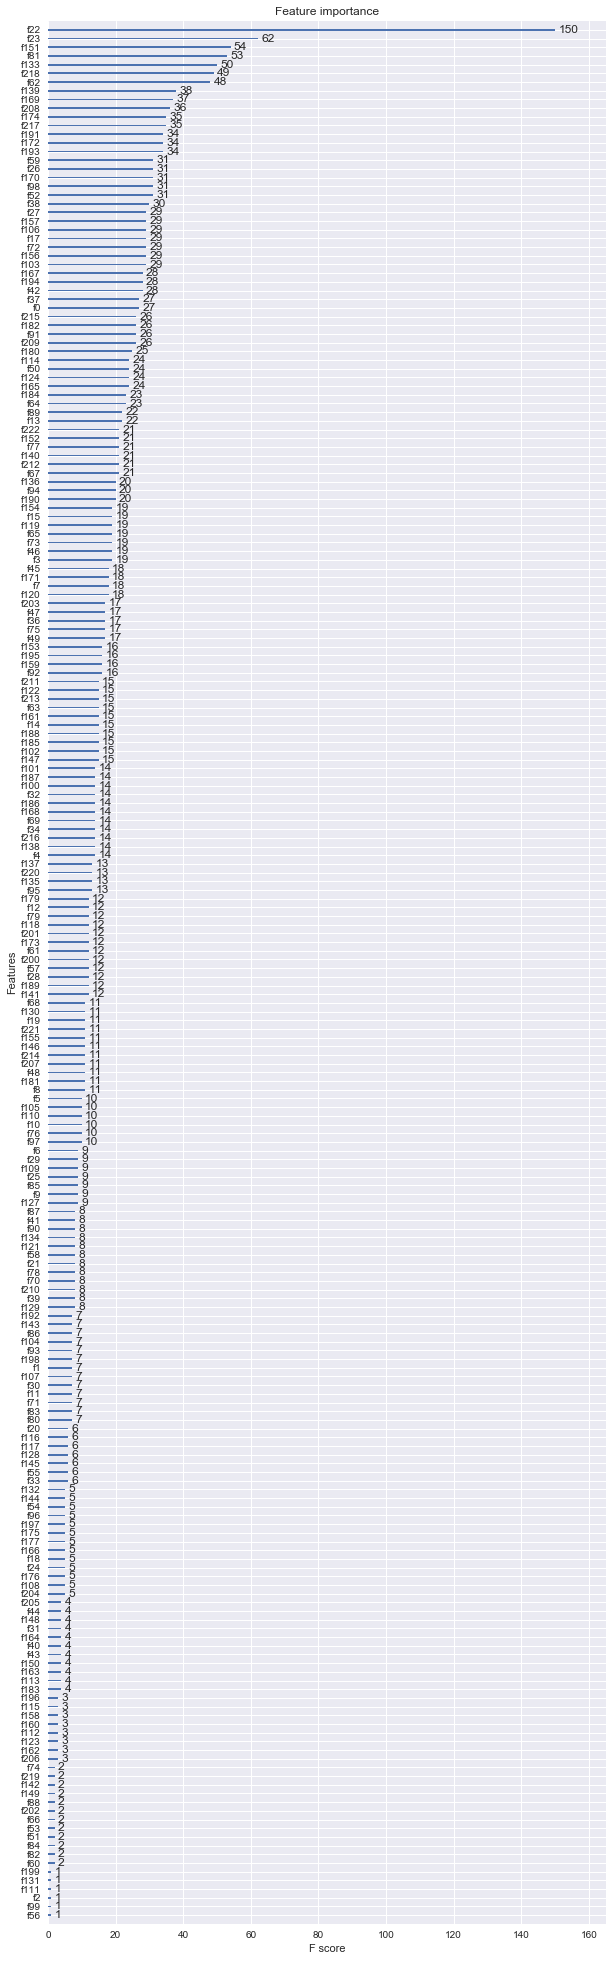

In [44]:
ax = train_df.xgboost.plot_importance()
fig = ax.figure
fig.set_size_inches(10, 35)
plt.show()

Now we can select only top 20-30 features.

**for the sake of demonstration, the max number of parameters is limited to two**


In [55]:
%%time

#http://xgboost.readthedocs.io/en/latest/how_to/param_tuning.html
#http://pandas-ml.readthedocs.io/en/latest/xgboost.html

# for the sake of demonstration, the max number of parameters is limited to 2

tuned_parameters = [{ "gamma":[0],'reg_alpha':[0, 0.001],
                     #"objective":['binary:logistic'],
                     #'colsample_bytree':[0.8],"learning_rate" : [0.3],
                     #'max_depth': [3,8],'min_child_weight':[2,6],
                     #'n_estimators':[800, 1500], 'scale_pos_weight':[1,2]
                    }]

#tuned_parameters = [{"learning_rate" : [0.15, 0.2,0.3]}]
                    # 'max_depth': [5,6,8],'min_child_weight':[3,5,11],
                    #'n_estimators':[700,1500]}]
CV_param = 10
cv = df.grid_search.GridSearchCV(train_df.xgb.XGBClassifier(), tuned_parameters, cv=CV_param)



df.fit(cv)
df.grid_search.describe(cv)

/Users/vadimborisov/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: DeprecationWarning: .grid_search is deprecated. Use .ms or .model_selection


CPU times: user 9min 27s, sys: 9.24 s, total: 9min 36s
Wall time: 2min 47s


/Users/vadimborisov/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: DeprecationWarning: .grid_search is deprecated. Use .ms or .model_selection


In [58]:
best_par = cv.best_params_
cv.best_params_

{'gamma': 0, 'reg_alpha': 0.001}

In [21]:
x_test = pd.read_csv("x_test.csv",sep=';',header=None)

x_test = x_test.add_suffix('_col')

In [108]:
import xgboost as xgb
cv = df.xgb.XGBClassifier(colsample_bytree = 0.8,gamma = 0, learning_rate = 0.3,
                          max_depth = 8, min_child_weight = 2, 
                          n_estimators = 800, objective = "binary:logistic",
                          reg_alpha = 0, scale_pos_weight = 1)
cv.fit(X,y.values.ravel())

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=8,
       min_child_weight=2, missing=None, n_estimators=800, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)